In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot_white.mplstyle")


## Read data


In [2]:
data = pandas.read_csv("InteractionLogs-211020-125559.csv")
data.head()


,frame_no,user_position,user_orientation,camera_hit_obj,camera_hit_point,camera_hit_dist,controller_hit_obj,controller_hit_point,controller_hit_distance
0,10,"(-10.05,3.31,-10.14)","(0.00,0.00,1.00)",Wall North,"(-10.05,3.31,12.25)",22.39,Wall North,"(-9.95,3.27,12.25)",21.96
1,20,"(-10.05,3.31,-10.14)","(0.00,0.00,1.00)",Wall North,"(-10.05,3.31,12.25)",22.39,Wall North,"(-9.95,3.27,12.25)",21.96
2,30,"(-10.05,3.31,-10.14)","(0.00,0.00,1.00)",Wall North,"(-10.05,3.31,12.25)",22.39,Wall North,"(-9.95,3.27,12.25)",21.96
3,40,"(-10.05,3.31,-10.14)","(0.00,0.00,1.00)",Wall North,"(-10.05,3.31,12.25)",22.39,Wall North,"(-9.95,3.27,12.25)",21.96
4,50,"(-10.05,3.31,-10.14)","(0.00,0.00,1.00)",Wall North,"(-10.05,3.31,12.25)",22.39,Wall North,"(-9.95,3.27,12.25)",21.96


In [3]:
data_room_1 = data.iloc[0:610, :]
data_room_2 = data.iloc[611:1072, :]
data_room_3 = data.iloc[1073:-1, :]


In [4]:
data_room_1.tail()


,frame_no,user_position,user_orientation,camera_hit_obj,camera_hit_point,camera_hit_dist,controller_hit_obj,controller_hit_point,controller_hit_distance
605,6060,"(7.35,3.31,-14.74)","(-0.08,0.00,-1.00)",Wall South (1),"(6.92,3.31,-20.25)",5.53,Teleporter 1,"(6.95,2.13,-18.61)",3.67
606,6070,"(7.35,3.31,-14.74)","(-0.08,0.00,-1.00)",Wall South (1),"(6.92,3.31,-20.25)",5.53,Teleporter 1,"(6.94,2.14,-18.61)",3.67
607,6080,"(7.35,3.31,-14.74)","(-0.08,0.00,-1.00)",Wall South (1),"(6.92,3.31,-20.25)",5.53,Teleporter 1,"(6.94,2.14,-18.60)",3.66
608,6090,"(7.35,3.31,-14.74)","(-0.08,0.00,-1.00)",Wall South (1),"(6.92,3.31,-20.25)",5.53,Teleporter 1,"(6.95,2.15,-18.59)",3.64
609,6100,"(7.35,3.31,-14.74)","(-0.08,0.00,-1.00)",Wall South (1),"(6.92,3.31,-20.25)",5.53,Teleporter 1,"(6.94,2.15,-18.58)",3.63


In [5]:
data_room_2.tail()


,frame_no,user_position,user_orientation,camera_hit_obj,camera_hit_point,camera_hit_dist,controller_hit_obj,controller_hit_point,controller_hit_distance
1067,10680,"(61.38,3.31,-13.16)","(0.45,0.00,-0.89)",Wall South (1),"(64.95,3.31,-20.25)",7.94,Teleporter 2,"(63.44,1.90,-18.65)",5.62
1068,10690,"(61.38,3.31,-13.16)","(0.45,0.00,-0.89)",Wall South (1),"(64.95,3.31,-20.25)",7.94,Teleporter 2,"(63.44,1.90,-18.65)",5.62
1069,10700,"(61.38,3.31,-13.16)","(0.45,0.00,-0.89)",Wall South (1),"(64.95,3.31,-20.25)",7.94,Teleporter 2,"(63.44,1.90,-18.64)",5.61
1070,10710,"(61.38,3.31,-13.16)","(0.45,0.00,-0.89)",Wall South (1),"(64.95,3.31,-20.25)",7.94,Teleporter 2,"(63.44,1.91,-18.64)",5.61
1071,10720,"(61.38,3.31,-13.16)","(0.45,0.00,-0.89)",Wall South (1),"(64.95,3.31,-20.25)",7.94,Teleporter 2,"(63.44,1.91,-18.63)",5.60


In [6]:
data_room_3.head()


,frame_no,user_position,user_orientation,camera_hit_obj,camera_hit_point,camera_hit_dist,controller_hit_obj,controller_hit_point,controller_hit_distance
1073,10740,"(98.37,2.06,-9.02)","(0.45,0.00,-0.89)",Wall South,"(100.00,2.06,-12.25)",3.62,Wall South,"(99.54,1.30,-12.25)",3.1
1074,10750,"(98.37,2.06,-9.02)","(0.45,0.00,-0.89)",Wall South,"(100.00,2.06,-12.25)",3.62,Wall South,"(99.54,1.30,-12.25)",3.1
1075,10760,"(98.37,2.06,-9.02)","(0.45,0.00,-0.89)",Wall South,"(100.00,2.06,-12.25)",3.62,Wall South,"(99.54,1.30,-12.25)",3.1
1076,10770,"(98.37,2.06,-9.02)","(0.45,0.00,-0.89)",Wall South,"(100.00,2.06,-12.25)",3.62,Wall South,"(99.54,1.30,-12.25)",3.1
1077,10780,"(98.37,2.06,-9.02)","(0.45,0.00,-0.89)",Wall South,"(100.00,2.06,-12.25)",3.62,Wall South,"(99.54,1.30,-12.25)",3.1


In [7]:
def split_coords_series(series: pandas.Series) -> pandas.DataFrame:
    name = series.name

    return (
        series.apply(lambda x: x[1:-1])
        .str.split(",", expand=True)
        .rename(columns={0: f"{name}_x", 1: f"{name}_y", 2: f"{name}_z"})
    )


## Extract coordinates

- user position
- camera hit point
- controller hit point


In [8]:
user_position_room_1 = split_coords_series(data_room_1["user_position"])
cam_hit_point_room_1 = split_coords_series(data_room_1["camera_hit_point"])
controller_hit_point_room_1 = split_coords_series(data_room_1["controller_hit_point"])

user_position_room_2 = split_coords_series(data_room_2["user_position"])
cam_hit_point_room_2 = split_coords_series(data_room_2["camera_hit_point"])
controller_hit_point_room_2 = split_coords_series(data_room_2["controller_hit_point"])

user_position_room_3 = split_coords_series(data_room_3["user_position"])
cam_hit_point_room_3 = split_coords_series(data_room_3["camera_hit_point"])
controller_hit_point_room_3 = split_coords_series(data_room_3["controller_hit_point"])


### Top down scatter plot


In [9]:
from typing import Tuple


def coords_to_np_array(df: pandas.DataFrame) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Transform Unity's coordinate system into matplotlib's equivalent

    Args:
        df (pandas.DataFrame): DataFrame which holds the x, y, and z coordinates in Unity's 3D format

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray]: Three numpy arrays representing the 3D coordinate in matplotlib's 3D system
    """
    return (
        np.array(df.iloc[:, 0], dtype=float),
        np.array(df.iloc[:, 2], dtype=float),
        -np.array(df.iloc[:, 1], dtype=float),
    )


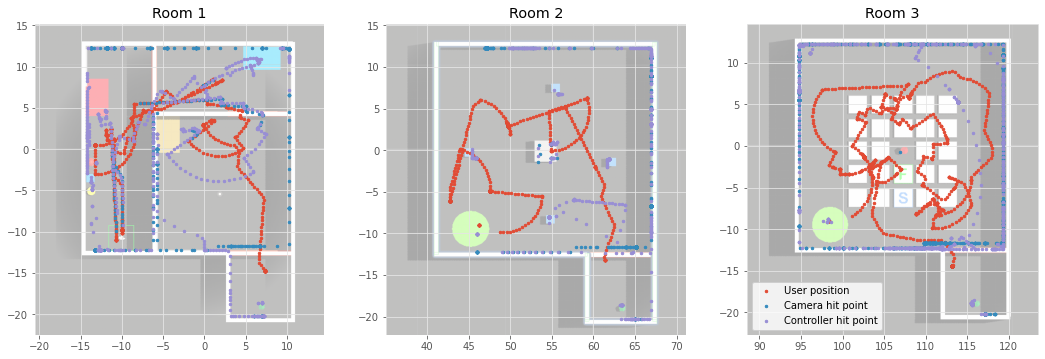

In [47]:
from matplotlib.axes import Axes


def plot_user_pos_on_scene(
    room_no: int,
    user_pos: pandas.DataFrame,
    cam_hit_pos: pandas.DataFrame,
    controller_hit_pos: pandas.DataFrame,
    ax: Axes,
    extent: list[int],
) -> None:
    """Generate scatter plots of user position on unity scene top down view

    Args:
        room_no (int): Room 1, 2, or 3
        user_pos (pandas.DataFrame): User position data frame
        cam_hit_pos (pandas.DataFrame): Camera hit point data frame
        controller_hit_pos (pandas.DataFrame): Controller hit point data frame
        ax (Axes): The axe to plot the scatter plot and background image on
        extent (list[int]): The scale of the background image (tailor made for each plot)
    """
    room = plt.imread(f"room_topdown/room{room_no}.png")
    user_x, user_y, user_z = coords_to_np_array(user_pos)
    cam_x, cam_y, cam_z = coords_to_np_array(cam_hit_pos)
    con_x, con_y, con_z = coords_to_np_array(controller_hit_pos)

    ax.imshow(room, alpha=0.4, extent=extent)
    ax.scatter(user_x, user_y, s=6, label="User position")
    ax.scatter(cam_x, cam_y, s=6, label="Camera hit point")
    ax.scatter(con_x, con_y, s=6, label="Controller hit point")

    ax.set_title(f"Room {room_no}")


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plot_user_pos_on_scene(
    1,
    user_position_room_1,
    cam_hit_point_room_1,
    controller_hit_point_room_1,
    axes[0],
    extent=[-20.5, 14.5, -22.5, 15.2],
)
plot_user_pos_on_scene(
    2,
    user_position_room_2,
    cam_hit_point_room_2,
    controller_hit_point_room_2,
    axes[1],
    extent=[35.1, 71.1, -22.2, 15.2],
)
plot_user_pos_on_scene(
    3,
    user_position_room_3,
    cam_hit_point_room_3,
    controller_hit_point_room_3,
    axes[2],
    extent=[88.5, 123.5, -22.7, 14.7],
)

plt.legend()
plt.tight_layout()
plt.show()

### 3D scatter plot


In [12]:
%matplotlib widget
from mpl_toolkits import mplot3d


def plot_3d_coords_in_axes(
    ax: Axes,
    user_position: pandas.DataFrame,
    cam_hit_point: pandas.DataFrame,
    controller_hit_point: pandas.DataFrame,
    plot_title: str
) -> None:
    """Plot 3D coordinates in matplotlib subplots

    Args:
        ax (Axes): A series of Axes returned from plt.subplots()
        user_position (pandas.DataFrame): User position dataframe
        cam_hit_point (pandas.DataFrame): Camera hit point dataframe
        controller_hit_point (pandas.DataFrame): Controller hit point dataframe
        plot_title (str): The title of the subplot
    """
    user_x, user_y, user_z = coords_to_np_array(user_position)
    cam_x, cam_y, cam_z = coords_to_np_array(cam_hit_point)
    controller_x, controller_y, controller_z = coords_to_np_array(controller_hit_point)

    ax.scatter3D(user_x, user_y, user_z, label="user position", s=6)
    ax.scatter3D(cam_x, cam_y, cam_z, label="camera hit", s=6)
    ax.scatter3D(controller_x, controller_y, controller_z, label="controller hit", s=6)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title(plot_title)


fig, axes = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(12, 4))

plot_3d_coords_in_axes(axes[0], user_position_room_1, cam_hit_point_room_1, controller_hit_point_room_1, "Room 1")
plot_3d_coords_in_axes(axes[1], user_position_room_2, cam_hit_point_room_2, controller_hit_point_room_2, "Room 2")
plot_3d_coords_in_axes(axes[2], user_position_room_3, cam_hit_point_room_3, controller_hit_point_room_3, "Room 3")

plt.suptitle("Plot of 3D scatter plots in Unity")
plt.legend(loc="upper right")
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …